Similarity for image 1 =  0.847696281829547
Similarity for image 2 =  0.903171377992194


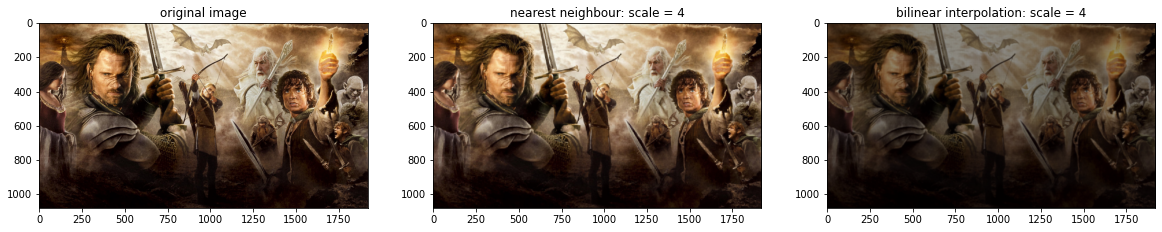

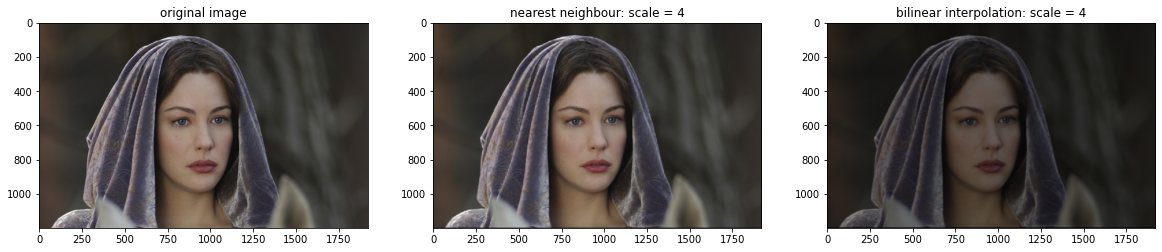

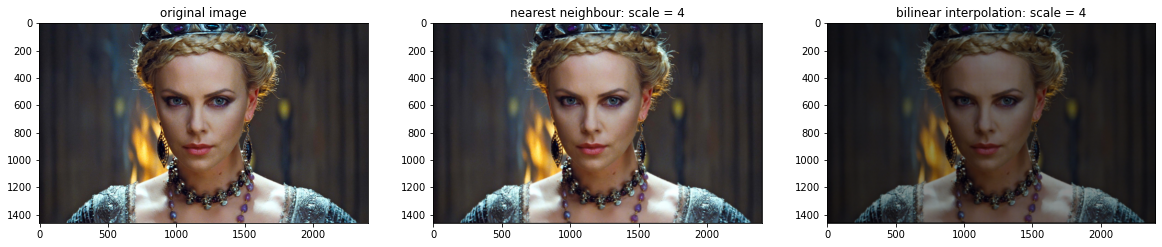

In [10]:
#Question[05]
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import random
import math

im01 = cv.imread(r'C:\Users\ALPHAXANDER\Downloads\a1q5images\im01.png', cv.IMREAD_COLOR)
assert im01 is not None
im01 = cv.cvtColor(im01, cv.COLOR_BGR2RGB)

im01small = cv.imread(r'C:\Users\ALPHAXANDER\Downloads\a1q5images\im01small.png', cv.IMREAD_COLOR)
assert im01small is not None
im01small = cv.cvtColor(im01small, cv.COLOR_BGR2RGB)

im02 = cv.imread(r'C:\Users\ALPHAXANDER\Downloads\a1q5images\im02.png', cv.IMREAD_COLOR)
assert im02 is not None
im02 = cv.cvtColor(im02, cv.COLOR_BGR2RGB)

im02small = cv.imread(r'C:\Users\ALPHAXANDER\Downloads\a1q5images\im02small.png', cv.IMREAD_COLOR)
assert im02small is not None
im02small = cv.cvtColor(im02small, cv.COLOR_BGR2RGB)

im03 = cv.imread(r'C:\Users\ALPHAXANDER\Downloads\a1q5images\im03.png', cv.IMREAD_COLOR)
assert im03 is not None
im03 = cv.cvtColor(im03, cv.COLOR_BGR2RGB)

im03small = cv.imread(r'C:\Users\ALPHAXANDER\Downloads\a1q5images\im03small.png', cv.IMREAD_COLOR)
assert im03small is not None
im03small = cv.cvtColor(im03small, cv.COLOR_BGR2RGB)

def zoom_nearest(image, scale):
    rows = int(image.shape[0]*scale)
    cols = int(image.shape[1]*scale)
    zoomed = np.zeros((rows, cols, 3), dtype=image.dtype)
    for r in range(rows):
        for c in range(cols):           
            if round(r/scale) == image.shape[0]:
                r -= scale
            if round(c/scale) == image.shape[1]:
                c -= scale
            zoomed[r,c] = image[round(r/scale), round(c/scale)]

    return zoomed.astype(np.uint8)

def zoom_bilinear(image, scale):
    rows = int(image.shape[0]*scale)
    cols = int(image.shape[1]*scale)
    zoomed = np.zeros((rows, cols, 3), dtype=image.dtype)
    for r in range(rows):
        for c in range(cols): 
            if math.ceil(r/scale) == image.shape[0]:
                r -= scale
            if math.ceil(c/scale) == image.shape[1]:
                c -= scale

            r_im, c_im = r/scale, c/scale
            row_floor_weight = math.ceil(r_im) - r_im
            row_ceil_weight = r_im - math.floor(r_im) 
            col_floor_weight = math.ceil(c_im) - c_im
            col_ceil_weight = c_im - math.floor(c_im)
            l_pixel = image[math.floor(r_im), math.floor(c_im)]*row_floor_weight + image[math.ceil(r_im), math.floor(c_im)]*row_ceil_weight
            r_pixel = image[math.floor(r_im), math.ceil(c_im)]*row_floor_weight + image[math.ceil(r_im), math.ceil(c_im)]*row_ceil_weight
            zoomed[r,c,0] = round(l_pixel[0]*col_floor_weight + r_pixel[0]*col_ceil_weight)
            zoomed[r,c,1] = round(l_pixel[1]*col_floor_weight + r_pixel[1]*col_ceil_weight)
            zoomed[r,c,2] = round(l_pixel[2]*col_floor_weight + r_pixel[2]*col_ceil_weight)

    return zoomed
 



#s = random.randint(1, 11)
s = 4
zoomed_NN = zoom_nearest(im01small, s)
zoomed_BI = zoom_bilinear(im01small, s)

fig1, ax = plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(im01)
ax[0].title.set_text('original image')

ax[1].imshow(zoomed_NN)
ax[1].title.set_text('nearest neighbour: scale = '+ str(s))

ax[2].imshow(zoomed_BI)
ax[2].title.set_text('bilinear interpolation: scale = '+ str(s))

#compare images
errorL2 = cv.norm(im01, zoom_bilinear(im01small, 4), cv.NORM_L2)
similarity = 1 - errorL2/(im01.shape[0]*im01.shape[0])
print('Similarity for image 1 = ',similarity)

#s = random.randint(1, 11)
zoomed_NN = zoom_nearest(im02small, s)
zoomed_BI = zoom_bilinear(im02small, s)

fig2, ax= plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(im02)
ax[0].title.set_text('original image')

ax[1].imshow(zoomed_NN)
ax[1].title.set_text('nearest neighbour: scale = '+ str(s))

ax[2].imshow(zoomed_BI)
ax[2].title.set_text('bilinear interpolation: scale = '+ str(s))

#compare images
errorL2 = cv.norm(im02, zoom_bilinear(im02small, 4), cv.NORM_L2)
similarity = 1 - errorL2/(im02.shape[0]*im02.shape[0])
print('Similarity for image 2 = ',similarity)


#s = random.randint(1, 11)
zoomed_NN = zoom_nearest(im03small, s)
zoomed_BI = zoom_bilinear(im03small, s)

fig3, ax= plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(im03)
ax[0].title.set_text('original image')

ax[1].imshow(zoomed_NN)
ax[1].title.set_text('nearest neighbour: scale = '+ str(s))

ax[2].imshow(zoomed_BI)
ax[2].title.set_text('bilinear interpolation: scale = '+ str(s))
